In [108]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization

In [125]:
# import cv2
# import os

# folder=r'C:\Users\naman\Downloads\Air Pollution Estimation\Air Pollution Estimation\Beijing\Beijing'
# def load_images_from_folder(folder):
#     images = []
#     for filename in os.listdir(folder):
#         img = cv2.imread(os.path.join(folder,filename))
#         if img is not None:
#             images.append(img)
#     return images

In [127]:
# updated=[]
# for i in range(0,len(img)):
#     updated.append(img[i][:380,:])

In [144]:
# for n in range(0, len(updated)):
#     data=updated[n][:380,:]
#     cv2.imwrite(f'C:/Users/naman/New folder/image_{n}.jpg',data)


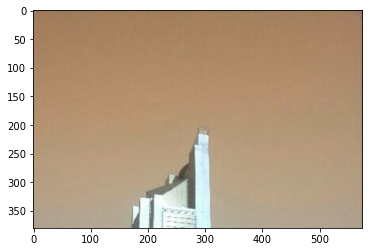

In [79]:
# b=a[:380,:]
# # plt.imshow(b)

In [1]:
import cv2
import os

In [149]:
folder=r'C:\Users\naman\Downloads\Air Pollution Estimation\Air Pollution Estimation\Beijing\Beijing'
from PIL import Image
def load_images_from_folder(folder):
    images = []
    label=[]
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder,filename))
        img=img.resize((500,500))
        img=np.array(img)
        if img is not None:
            images.append(img)
            label.append(filename)
    return images,label

In [150]:
im,lab=load_images_from_folder(folder)

In [151]:
upper_img=[]
lower_img=[]
for i in range(len(img)):
    upper_img.append(img[i][:170,:])
    lower_img.append(img[i][170:,:])

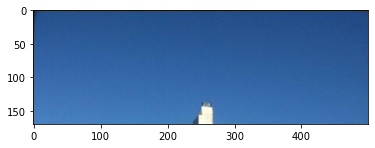

In [152]:
plt.imshow(upper_img[4])

In [153]:
lab=np.array(lab)

In [174]:
upper_img=np.array(upper_img).astype(np.int)
upper_img.shape

(327, 170, 500, 3)

In [175]:
import tensorflow

In [176]:
upper_img.dtype

dtype('int32')

In [187]:
x_tensor = tensorflow.convert_to_tensor(upper_img, dtype=tensorflow.int64) 

In [190]:
model=tensorflow.keras.models.Sequential()
# model.add(Input(shape=(upper_img.shape[1:])))
model.add(Conv2D(128,activation='relu',kernel_size=(5,5),strides=2,input_shape=upper_img.shape[1:]))
model.add(Conv2D(128,activation='relu',kernel_size=(5,5),strides=1))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))
model.add(Conv2D(128,activation='relu',kernel_size=(5,5),strides=1))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))
model.add(Conv2D(192,activation='relu',kernel_size=(3,3),strides=1))
model.add(Conv2D(192,kernel_size=(3,3),strides=2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(1))

In [191]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])

In [192]:
lab=np.array(lab)

In [193]:
model.fit(upper_img,lab,epochs=50)

Epoch 1/50


UnimplementedError:  Cast string to float is not supported
	 [[node mean_squared_error/Cast (defined at <ipython-input-193-0c75b04f2658>:1) ]] [Op:__inference_train_function_10570]

Function call stack:
train_function
